#**Enunciado**

Trabajamos como científicos de datos para una empresa de retail que, debido al cambio en los hábitos de consumo de los clientes, está potenciando ampliamente el servicio de venta online. La empresa quiere realizar un modelo de aprendizaje automático para clasificar a los clientes en función de la probabilidad de generar ingresos al comprar en la web. El objetivo es realizar una serie de acciones específicas para los clientes que es más probable que hagan compras en la web.

Para ello, la empresa ha ido recopilando datos con su herramienta de Google Analytics. Cuenta con datos de sesiones, cada una de ellas de un cliente distinto en un periodo de un año.

##**Tareas que nos pide la empresa:**

1. Realización de un análisis de las variables del dataset de Google
Analytics como pueden ser histogramas, boxplots, etc. Cualquier otro análisis es bienvenido, siempre explicándolo y con un sentido de negocio.
2. Tratamiento de los valores faltantes, outliers, etc., en caso de que los hubiese. Si hay valores con missings, habrá que eliminarlos con el método de Pandas llamado Dropna().na.
3. Tratamiento de categóricas, pasándolas a numéricas por medio de dummies, mapeándolas o utilizando un label encoder. Hay que justificar las operaciones que se realizan.
4. Si existe alguna variable que se necesite borrar, habrá que borrarla y justificarlo.
5. Estandariza los datos.
6. Dividir los datos en train y en test. Con los datos de train se pretende ajustar modelos con CrossValidation y GridSearch.
  * Utilizar un modelo lineal. Entre los modelos lineales están las regresiones logísticas, las regresiones lineales, etc.
  * Utilizar un modelo de redes neuronales.
  * Utilizar cualquier otro modelo de clasificación.
7. Optimizar algún parámetro de cada modelo utilizando CrossValidation y GridSearch, o de la forma que se estime oportuna, siempre justificándolo.
8. Elegir el mejor modelo de los tres según la métrica ROC en CrossValidation. Predecir Test y obtener una métrica estimada.
9. Umbralizar las probabilidades utilizando el umbral que maximice el área bajo la curva ROC.

##**Notas:**
* Lo que se pide es un modelo end-to-end como los vistos en prácticas en el módulo. En este caso, hay que aplicar tres modelos y escoger el mejor, pero la parte previa es común a los tres.

* Se tendrán en cuenta la estructura del código, las interpretaciones y las justificaciones.

* El esquema que se pone en las tareas es un esquema general. Si se necesita hacer alguna tarea, se puede llevar a cabo. También es posible aplicar cualquier otro algoritmo visto en el módulo, siempre justificando y haciendo las cosas con un sentido.


##**Información de los datos:**

* El conjunto de datos consta de diez atributos numéricos y ocho categóricos.

* El atributo **revenue** puede ser usado como la etiqueta de la clase.

* Administrative, administrative duration, informational, informational duration, product related y product related duration representan el número de diferentes tipos de páginas visitadas por el visitante en esa sesión y el tiempo total dedicado a cada una de estas categorías de páginas. Los valores de estas características se derivan de la información del URL de las páginas visitadas por el usuario y se actualizan en tiempo real cuando el usuario realiza una acción, por ejemplo, pasar de una página a otra.

* Las características bounce rate, exit rate y page value representan las métricas medidas por Google Analytics para cada página del sitio de comercio electrónico. El valor de la característica bounce rate de una página web se refiere al porcentaje de visitantes que entran en el sitio desde esa página y luego salen (rebote) sin activar ninguna otra solicitud al servidor de análisis durante esa sesión. El valor de la característica exit rate para una página web específica se calcula como para todas las visitas a la página, el porcentaje que fueron las últimas en la sesión. La función Page Value representa el valor medio de una página web que un usuario ha visitado antes de completar una transacción de comercio electrónico.

* La característica de special day indica la cercanía de la hora de visita del sitio a un día especial específico (por ejemplo, el Día de la Madre, San Valentín) en el que es más probable que las sesiones finalicen con una transacción. El valor de este atributo se determina teniendo en cuenta la dinámica del comercio electrónico, como la duración entre la fecha del pedido y la fecha de entrega. Por ejemplo, para San Valentín, este valor toma un valor distinto de 0 entre el 2 y el 12 de febrero, 0 antes y después de esta fecha a menos que esté cerca de otro día especial, y su valor máximo de 1 el 8 de febrero.

* El conjunto de datos también incluye el sistema operativo, el navegador, la región, el tipo de tráfico, el tipo de visitante como visitante que regresa o como nuevo visitante, un valor booleano que indica si la fecha de la visita es de fin de semana, y el mes del año.

* Los datos se han obtenido de la siguiente web, aunque se pueden descargar de la plataforma de IMF Business School: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

# **Resolución**

## **Carga de librerías**

In [295]:
# Importación de librerias

# Manipulación de datos
import numpy as np
import pandas as pd
from math import ceil
pd.options.display.max_columns = 50 # Para visualizar mas columnas

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = [12,6] # Tamaño para los gráficos

# ML
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score

# Ignorar las advertencias
import warnings
warnings.filterwarnings('ignore')





##**Carga de datos y primeras observaciones**

In [296]:
# Carga de datos
df_raw = pd.read_csv("/content/online_shoppers_intention.csv")

In [297]:
# Estructura del dataframe
# Filas = 12330
# Columnas = 18
df_raw.shape

(12330, 18)

In [298]:
# Observación de los primeros 5 registros
df_raw.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [299]:
# Información sobre los datos
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [300]:
# Observación más detallada de los valores de las columnas
for col in df_raw.columns:
    print(f"{col}: {df_raw[col].unique()}")


Administrative: [ 0.  1.  2.  4. 12.  3. 10.  6.  5.  9.  8. 16. 13. 11.  7. 18. 14. 17.
 19. 15. nan 24. 22. 21. 20. 23. 27. 26.]
Administrative_Duration: [  0.         -1.         53.        ... 167.9107143 305.125
 150.3571429]
Informational: [ 0.  1.  2.  4. 16.  5.  3. 14.  6. 12.  7. nan  9. 10.  8. 11. 24. 13.]
Informational_Duration: [  0.    -1.   120.   ... 547.75 368.25 211.25]
ProductRelated: [  1.   2.  10.  19.   3.  16.   7.   6.  23.  13.  20.   8.   5.  32.
   4.  45.  14.  52.   9.  46.  15.  22.  11.  12.  36.  42.  27.  90.
  18.  38.  17. 128.  25.  30.  21.  51.  26.  28.  31.  24.  50.  96.
  49.  68.  98.  67.  55.  35.  37.  29.  34.  71.  63.  87.  40.  33.
  54.  64.  75.  39. 111.  81.  61.  47.  44.  88. 149.  41.   0.  79.
  66.  43. 258.  80.  62.  83. 173.  48.  58.  57.  56.  69.  82.  59.
 109. 287.  53.  84.  78. 137. 113.  89.  65.  60.  nan 104. 129.  77.
  74.  93.  76.  72. 194. 140. 110. 132. 115.  73. 328. 160.  86. 150.
  95. 130. 151. 117. 124

In [301]:
# Observación de valores nulos
df_raw.isnull().sum()
#df_raw.isna().sum() Equivalente

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

**Primeras observaciones:**
* El dataframe original cuenta con 12330 registros o filas.
* El dataframe original cuenta co 18 columnas.
* Existen columnas tipo numericas (int, float)
* Existen columnas tipo objetos (object) que representan un conjunto "acotado" de valores, como por ejemplo "Month" y "VisitorType"
* Existen colomnas tipo booleanas (bool) como son los casos de "Weekend" y "Revenue"
* Existen registros con valores nulos (14) en algunos campos los cuales se observaran con mayor detalle en pasos posteriores.
* Existen columnas tipo numericas (int, float) que representan un conjunto acotado de valores, como por ejemplo "OperatingSystems", entre otras.

**Columnas numércias: 10**
* Administrative
* Adninistrative_Duration
* Informational
* Informational_Duration
* ProducRelated
* ProductRelated_Duration
* BounceRates
* ExitRates
* PageValues
* SpecialDay

**Columnas categóricas: 8**
* Month
* OperatingSystems
* Browser
* Region
* TrafficType
* VisitorType
* Weekend
* Revenue



In [302]:
# Descripción de campos numericos
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12316.0,2.317798,3.322754,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12316.0,80.906176,176.860432,-1.0,0.000000,8.000000,93.500000,3398.750000
Informational,12316.0,0.503979,1.270701,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12316.0,34.506387,140.825479,-1.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12316.0,31.763884,44.490339,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12316.0,1196.037057,1914.372511,-1.0,185.000000,599.766190,1466.479902,63973.522230
BounceRates,12316.0,0.022152,0.048427,0.0,0.000000,0.003119,0.016684,0.200000
ExitRates,12316.0,0.043003,0.048527,0.0,0.014286,0.025124,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [303]:
# Descripción de campos no numéricos

# 'count' se refiere al número total de casos no nulos, 'unique' al número de opciones posibles,
# 'top' a la opción más frecuente y 'freq' a la frecuencia de la opción más frecuente

df_raw.describe(include = ['object','bool']).T

,count,unique,top,freq
Month,12330,10,May,3364
VisitorType,12330,3,Returning_Visitor,10551
Weekend,12330,2,False,9462
Revenue,12330,2,False,10422


Como vimos anteriormente, dentro del conjunto de columnas numéricas existen algunas con valores perdidos. Ellas son:
* Administrative             
* Administrative_Duration    
* Informational              
* Informational_Duration     
* ProductRelated             
* ProductRelated_Duration    
* BounceRates                
* ExitRates

Además, llama la atención el valor mínimo (-1) que existe en las columnas:
* Administrative_Duration
* Informational_Duration
* ProductRelated_Duration

Por otro lado, se observa que la cantidad de meses es 10 y no 12.

El tratamiento de valores perdidos como valores (-1) se abordarán en el punto 2

## **Visualizaciones Exploratorias de los datos**

* Variables Categóricas
  * Month
  * OperatingSystems
  * Browser
  * Region
  * TrafficType
  * VisitorType
  * Weekend
  * Revenue

In [304]:
categorical_cols = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

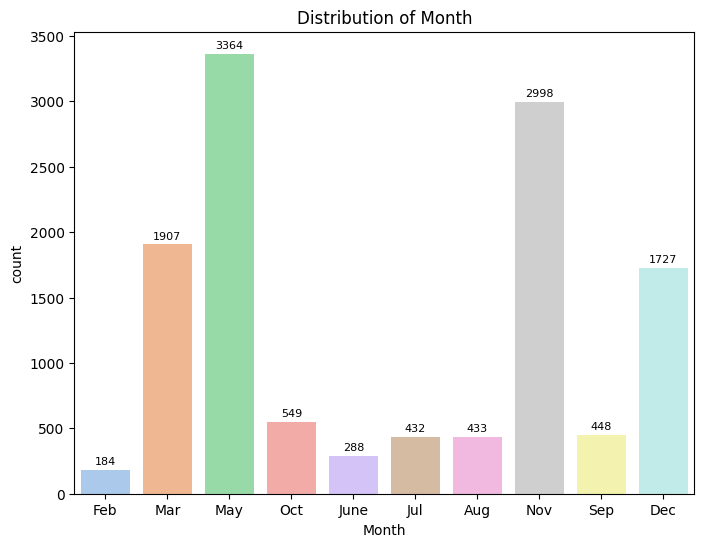

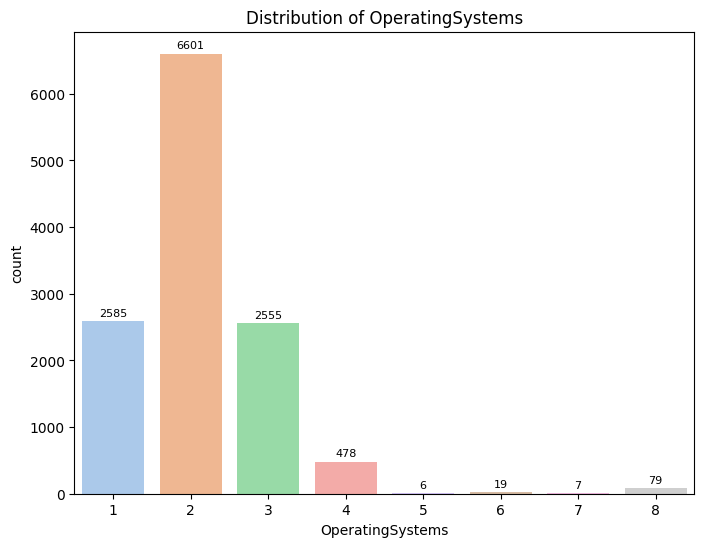

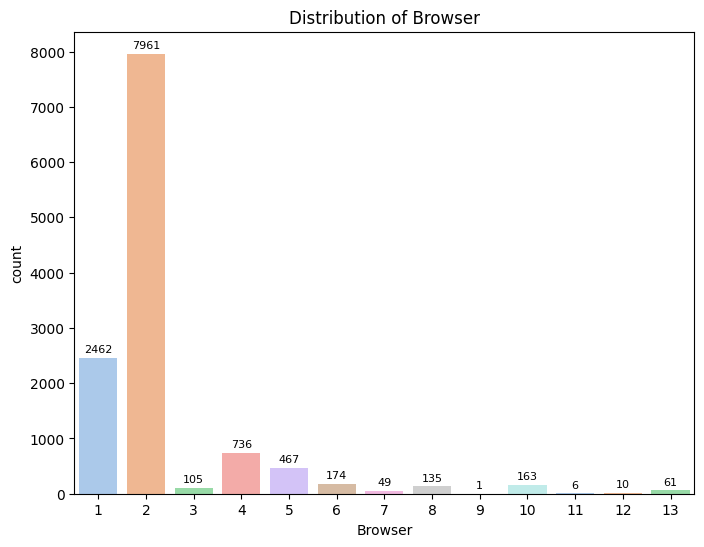

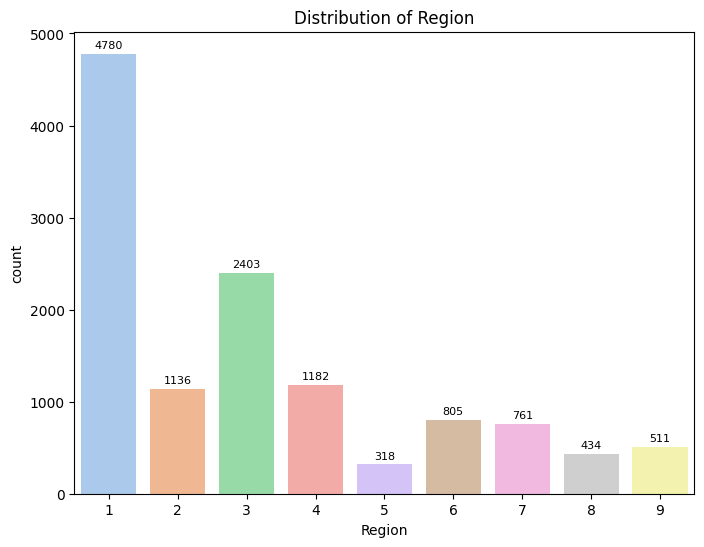

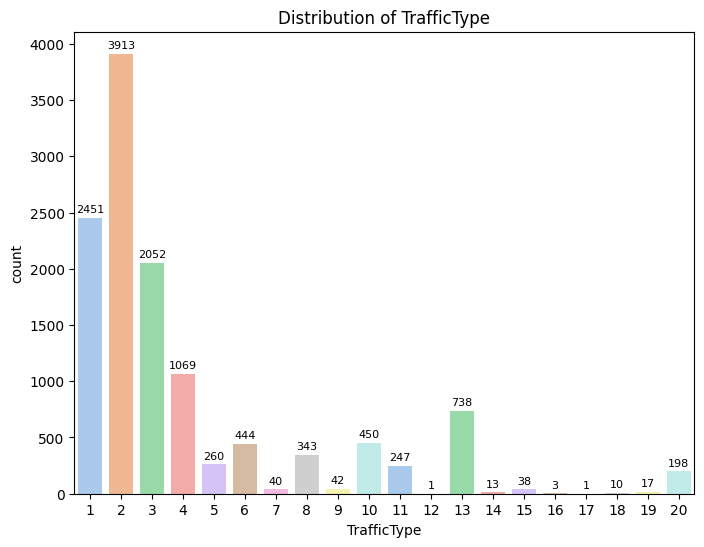

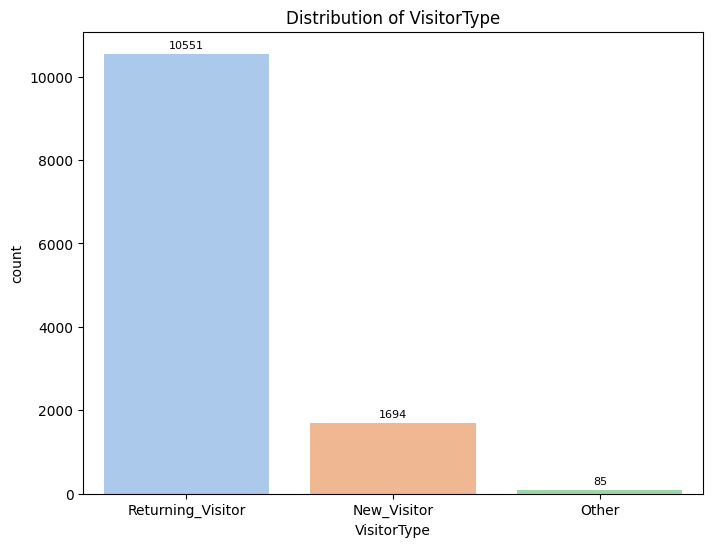

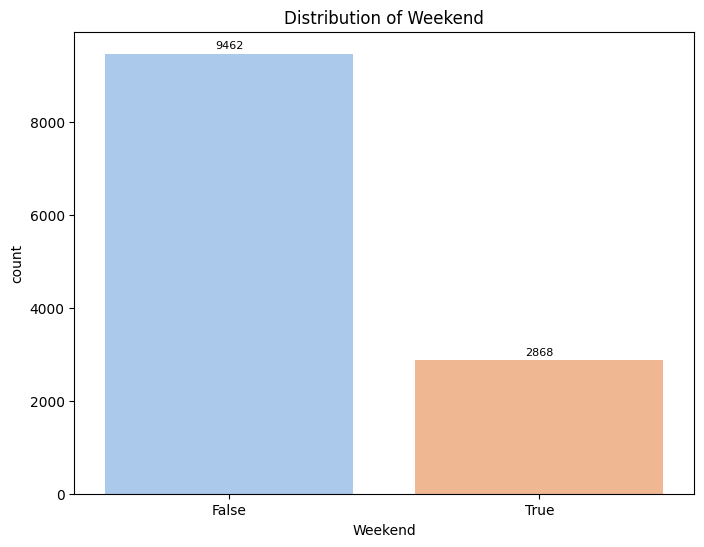

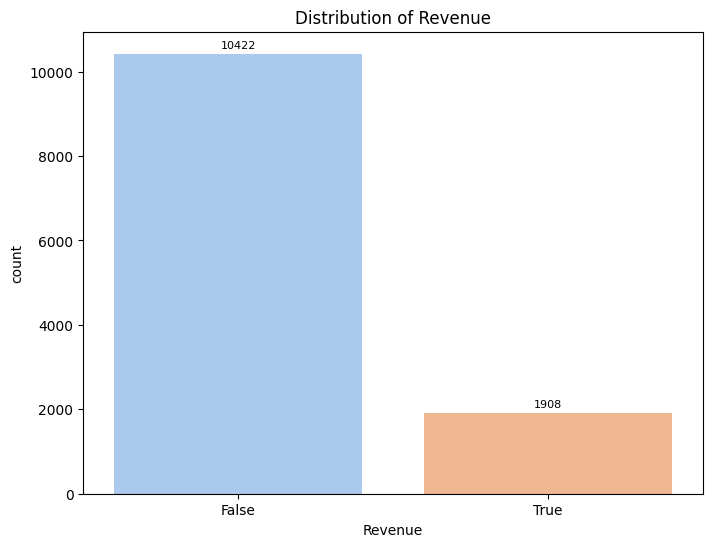

In [305]:
# Iterar sobre las columnas categóricas
for col in categorical_cols:
    plt.figure(figsize=(8, 6))

    # Elección del gráfico
    ax = sns.countplot(x=col, data=df_raw, palette='pastel')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=0)

    # Añadir etiquetas con la frecuencia encima de cada barra
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 6),
                    textcoords = 'offset points',
                    fontsize=8)

    plt.show()

**Observaciones:**
* Distribution of Month:
  * Meses sin datos: Enero, Abril
* Distribution of VisitorType
  * Other: Tipo de visitante sin una definición clara

* Variables Numéricas
  * Administrative           
  * Administrative_Duration   
  * Informational            
  * Informational_Duration   
  * ProductRelated           
  * ProductRelated_Duration   
  * BounceRates               
  * ExitRates                 
  * PageValues                
  * SpecialDay



In [306]:
df_numeric = df_raw.drop(columns=categorical_cols)

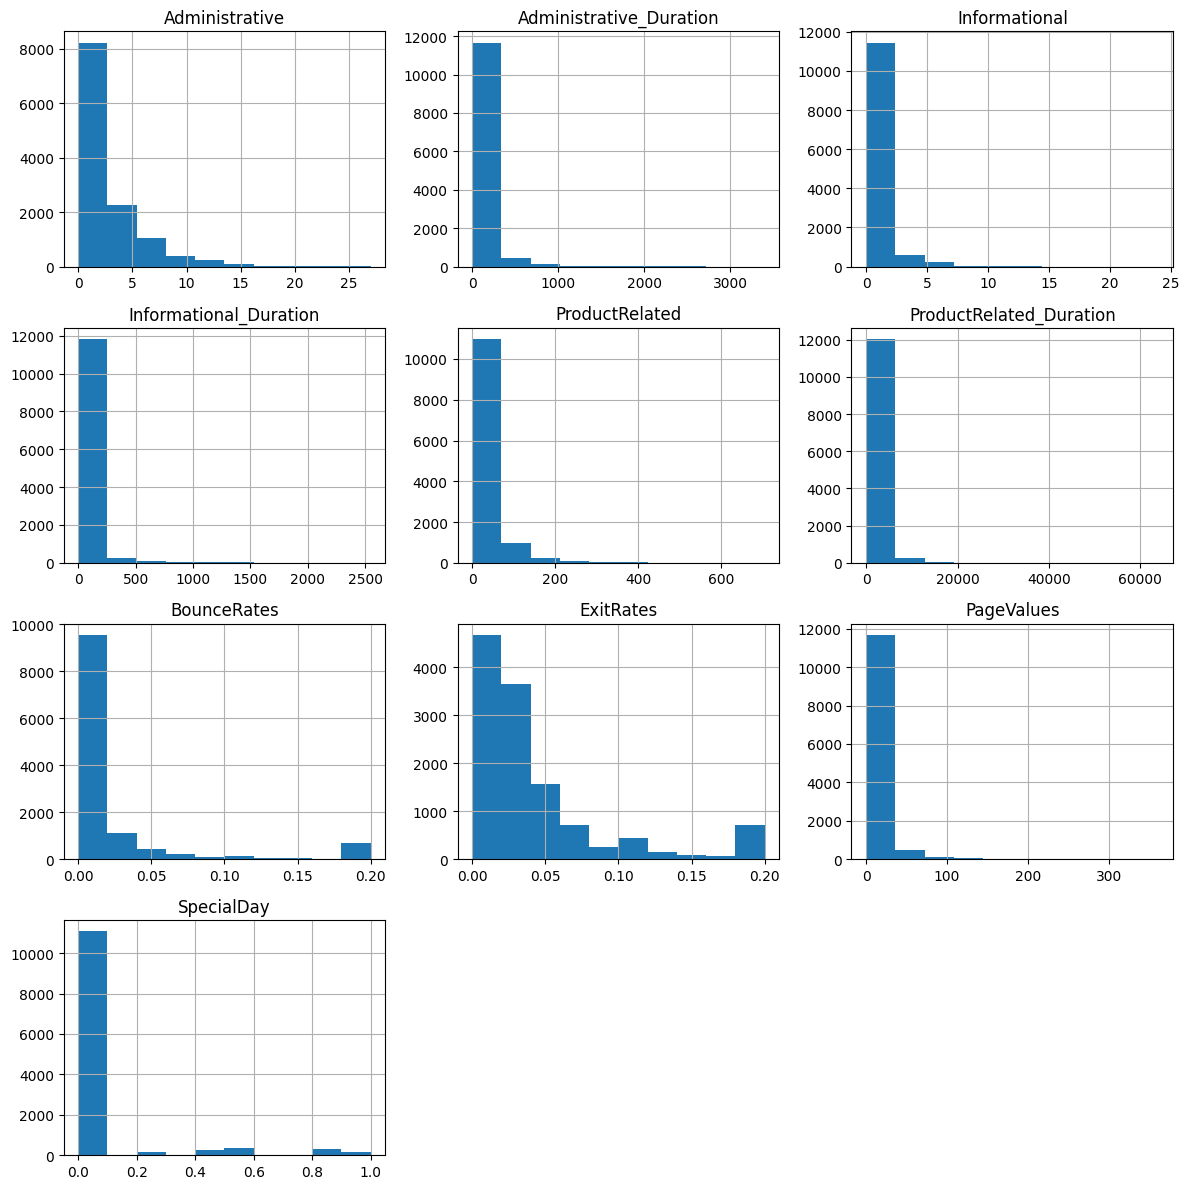

In [307]:
# Visualización de columnas numéricas

# Definición de los gráficos
df_numeric.hist(figsize=(12, 12))
plt.tight_layout()
plt.show()

## **Tratamiento de Missings**

In [308]:
# Observación del porcentaje de valores perdidos
porcentaje = df_raw.isnull().sum()/df_raw.shape[0]
print(f'Porcentaje de valores perdidos:\n{porcentaje}')

Porcentaje de valores perdidos:
Administrative             0.001135
Administrative_Duration    0.001135
Informational              0.001135
Informational_Duration     0.001135
ProductRelated             0.001135
ProductRelated_Duration    0.001135
BounceRates                0.001135
ExitRates                  0.001135
PageValues                 0.000000
SpecialDay                 0.000000
Month                      0.000000
OperatingSystems           0.000000
Browser                    0.000000
Region                     0.000000
TrafficType                0.000000
VisitorType                0.000000
Weekend                    0.000000
Revenue                    0.000000
dtype: float64


In [309]:
# Cantidad de registros con valor -1
cols_duration = ['Administrative_Duration','Informational_Duration','ProductRelated_Duration']
for col in cols_duration:
  print(f'Columna: {col} \tTotal valores (-1): {(df_raw[col] == -1).sum()}\t Porcentaje (-1): {(df_raw[col] == -1).sum()/df_raw[col].count():.4f}' )

Columna: Administrative_Duration 	Total valores (-1): 33	 Porcentaje (-1): 0.0027
Columna: Informational_Duration 	Total valores (-1): 33	 Porcentaje (-1): 0.0027
Columna: ProductRelated_Duration 	Total valores (-1): 33	 Porcentaje (-1): 0.0027


* Como podemos observar el porcentaje de los valores perdidos con respecto al total de los registro es muy bajo, por lo que presindiremos de ellos.
* Lo mismo ocurre para aquellos campos que contienen valores -1, por lo que tambien presindiremos de ellos.

In [310]:
# Copiamos dataframe original
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [311]:
# Eliminamos valores perdidos y reseteamos el índice
df = df.dropna().reset_index(drop=True)
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [312]:
# Dataframe resultante
# Filas: 12283
# Columnas: 18
df.shape

(12316, 18)

In [313]:
# Eliminar los registros con valor -1 en las columnas
cols_duration = ['Administrative_Duration','Informational_Duration','ProductRelated_Duration']
for col in cols_duration:
  df = df[df[col] != -1]

# Resetear el índice después de eliminar los registros
df.reset_index(drop=True, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12283 non-null  float64
 1   Administrative_Duration  12283 non-null  float64
 2   Informational            12283 non-null  float64
 3   Informational_Duration   12283 non-null  float64
 4   ProductRelated           12283 non-null  float64
 5   ProductRelated_Duration  12283 non-null  float64
 6   BounceRates              12283 non-null  float64
 7   ExitRates                12283 non-null  float64
 8   PageValues               12283 non-null  float64
 9   SpecialDay               12283 non-null  float64
 10  Month                    12283 non-null  object 
 11  OperatingSystems         12283 non-null  int64  
 12  Browser                  12283 non-null  int64  
 13  Region                   12283 non-null  int64  
 14  TrafficType           

In [314]:
# Dataframe resultante
# Filas: 12283
# Columnas: 18
df.shape

(12283, 18)

A partir de este aquí, trabajaremos con el nuevo dataframe resultante del proceso anterior, para continuar con los puntos que siguen.

## **Tratamiento de Variables Categóricas**

Para seleccionar que tipo de métodología usar, se resumen sus diferencias:
* Mapeo: Manual, control total, útil para categorías con orden natural.
* Dummies: Automatizado, convierte categorías en columnas binarias, aumenta dimensionalidad, útil para categorías nominales.
* Label Encoder: Automatizado, convierte categorías en valores numéricos, no aumenta dimensionalidad, puede inducir orden falso.

En este caso se usará el "mapeo" debido que las categorías son conocidas y son pocas categorías.

Además con este método, no aumentamos la dimensionalidad de columnas del dataframe.

In [315]:
# Conversión de columna 'Revenue' a numérica
revenue_mapping = {False:0, True:1}
df['Revenue'] = df['Revenue'].map(revenue_mapping)

In [316]:
# Conversión de columna 'Weekend' a numérica
weekend_mapping = {False:0, True:1}
df['Weekend'] = df['Weekend'].map({False:0, True:1})

In [317]:
# Conversión de columna 'Month' a numérica
month_mapping = {'Feb':2, 'Mar':3, 'May':5, 'June':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
df['Month'] = df['Month'].map(month_mapping)

In [318]:
# Conversión de columna 'VisitorType' a numérica
visitor_mapping = {'Returning_Visitor':0, 'New_Visitor':1, 'Other':2}
df['VisitorType'] = df['VisitorType'].map(visitor_mapping)

In [319]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,2,1,1,1,1,0,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,2,2,2,1,2,0,0,0
2,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,2,3,2,2,4,0,0,0
3,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,2,3,3,1,4,0,1,0
4,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,2,2,2,1,3,0,0,0


##**División de los datos en features X y target Y**

In [320]:
X = df.drop('Revenue', axis=1) # Features
Y = df['Revenue'] # Tarjet

## **Análisis Gráfico de los datos**

In [321]:
# Definimos funciones para gráficos relacionales entre features y target

def relaciones_vs_target(X, Y, return_type='axes'):
    fig_tot = (len(X.columns))
    fig_por_fila = 4
    tamanio_fig = 4
    num_filas = int( np.ceil(fig_tot/fig_por_fila) )
    plt.figure( figsize=( fig_por_fila*tamanio_fig+5, num_filas*tamanio_fig+5 ) )
    c = 0
    for i, col in enumerate(X.columns):
        plt.subplot(num_filas, fig_por_fila, i+1)
        sns.scatterplot(x=X[col], y=Y)
        plt.title( '%s vs %s' % (col, 'target') )
        plt.ylabel('Target')
        plt.xlabel(col)
    plt.show()

def represento_doble_hist(x_1, x_0, n_bins=11, title='', label_1='Clase 1',
                          label_0='Clase 0', density=0):
    bins = n_bins
    plt.hist(x_1, bins, density = density, alpha=0.5, label=label_1, color='red')
    plt.hist(x_0, bins, density = density, alpha=0.5, label=label_0, color='green')
    plt.title(title)
    plt.legend(loc='best')

def hist_pos_neg_feat(x, y, density=0, nbins=11, targets=(0,1)):
    fig_tot = len(x.columns)
    fig_tot_fila = 4; fig_tamanio = 4
    num_filas = int( np.ceil(fig_tot/fig_tot_fila) )
    plt.figure( figsize=( fig_tot_fila*fig_tamanio+2, num_filas*fig_tamanio+2 ) )
    target_neg, target_pos = targets
    for i, feat in enumerate(x.columns):
        plt.subplot(num_filas, fig_tot_fila, i+1);
        plt.title('%s' % feat)
        idx_pos = y == target_pos
        idx_neg= y == target_neg
        represento_doble_hist(x[feat][idx_pos].values, x[feat][idx_neg].values, nbins,
                   density = density, title=('%s' % feat))

def plot_data_count(df, col, return_pct_share=True, hue=None, figsize=(12,6)):
    plt.figure(figsize=figsize)
    g = sns.countplot(data=df, x=col, hue=hue)
    for rect in g.patches:
        h = rect.get_height()
        w = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
        g.annotate(f"{h}", (x+w/2, h), ha='center', va='bottom', fontsize=12)
    g.spines['top'].set_visible(False)
    g.spines['right'].set_visible(False)
    g.spines['left'].set_visible(False)

    plt.show()

    if return_pct_share:
        print("\n")
        print("Percent share for each category:")
        print(df[col].value_counts(normalize=True)*100)

**Descriptivos básicos**

In [322]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12283.0,2.323862,3.325128,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12283.0,81.126229,177.046838,0.0,0.000000,8.000000,93.950000,3398.750000
Informational,12283.0,0.505333,1.272138,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12283.0,34.601780,141.002498,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12283.0,31.846536,44.521443,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12283.0,1199.253065,1915.935446,0.0,187.100000,602.500000,1470.909852,63973.522230
BounceRates,12283.0,0.021723,0.047686,0.0,0.000000,0.003077,0.016667,0.200000
ExitRates,12283.0,0.042611,0.047964,0.0,0.014286,0.025000,0.050000,0.200000
PageValues,12283.0,5.911793,18.600350,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12283.0,0.061532,0.199122,0.0,0.000000,0.000000,0.000000,1.000000


**Boxplots**

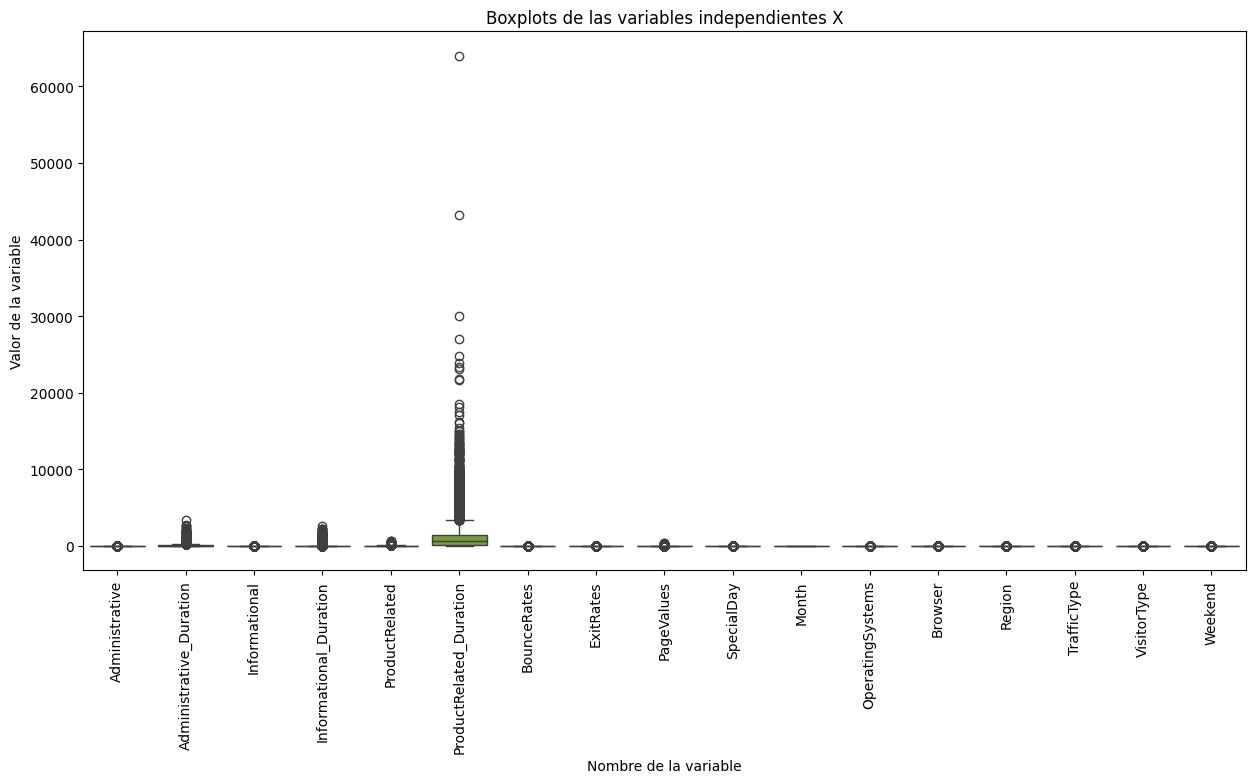

In [323]:
# Representación de los boxplots de las features

plt.figure(figsize=(15,7))
ax = sns.boxplot(data=X)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title(u'Boxplots de las variables independientes X')
plt.ylabel('Valor de la variable')
_ = plt.xlabel('Nombre de la variable')

Observaciones:
* Alta Variabilidad: ProductRelated_Duration es la feature más variable con muchos outliers.

* Baja Variabilidad: La mayoría de las otras features muestran baja variabilidad y menos outliers.

* Features como Administrative, Informational, BounceRates y ExitRates tienen un comportamiento consistente en todo el conjunto de datos.

Se observa que las variables relacionadas con la duración son la que más outliers poseen, cosa que tiene sentido al tratarse de el tiempo que puede destinar cada usuario a la navegación dentro de una web.

**Histogramas**

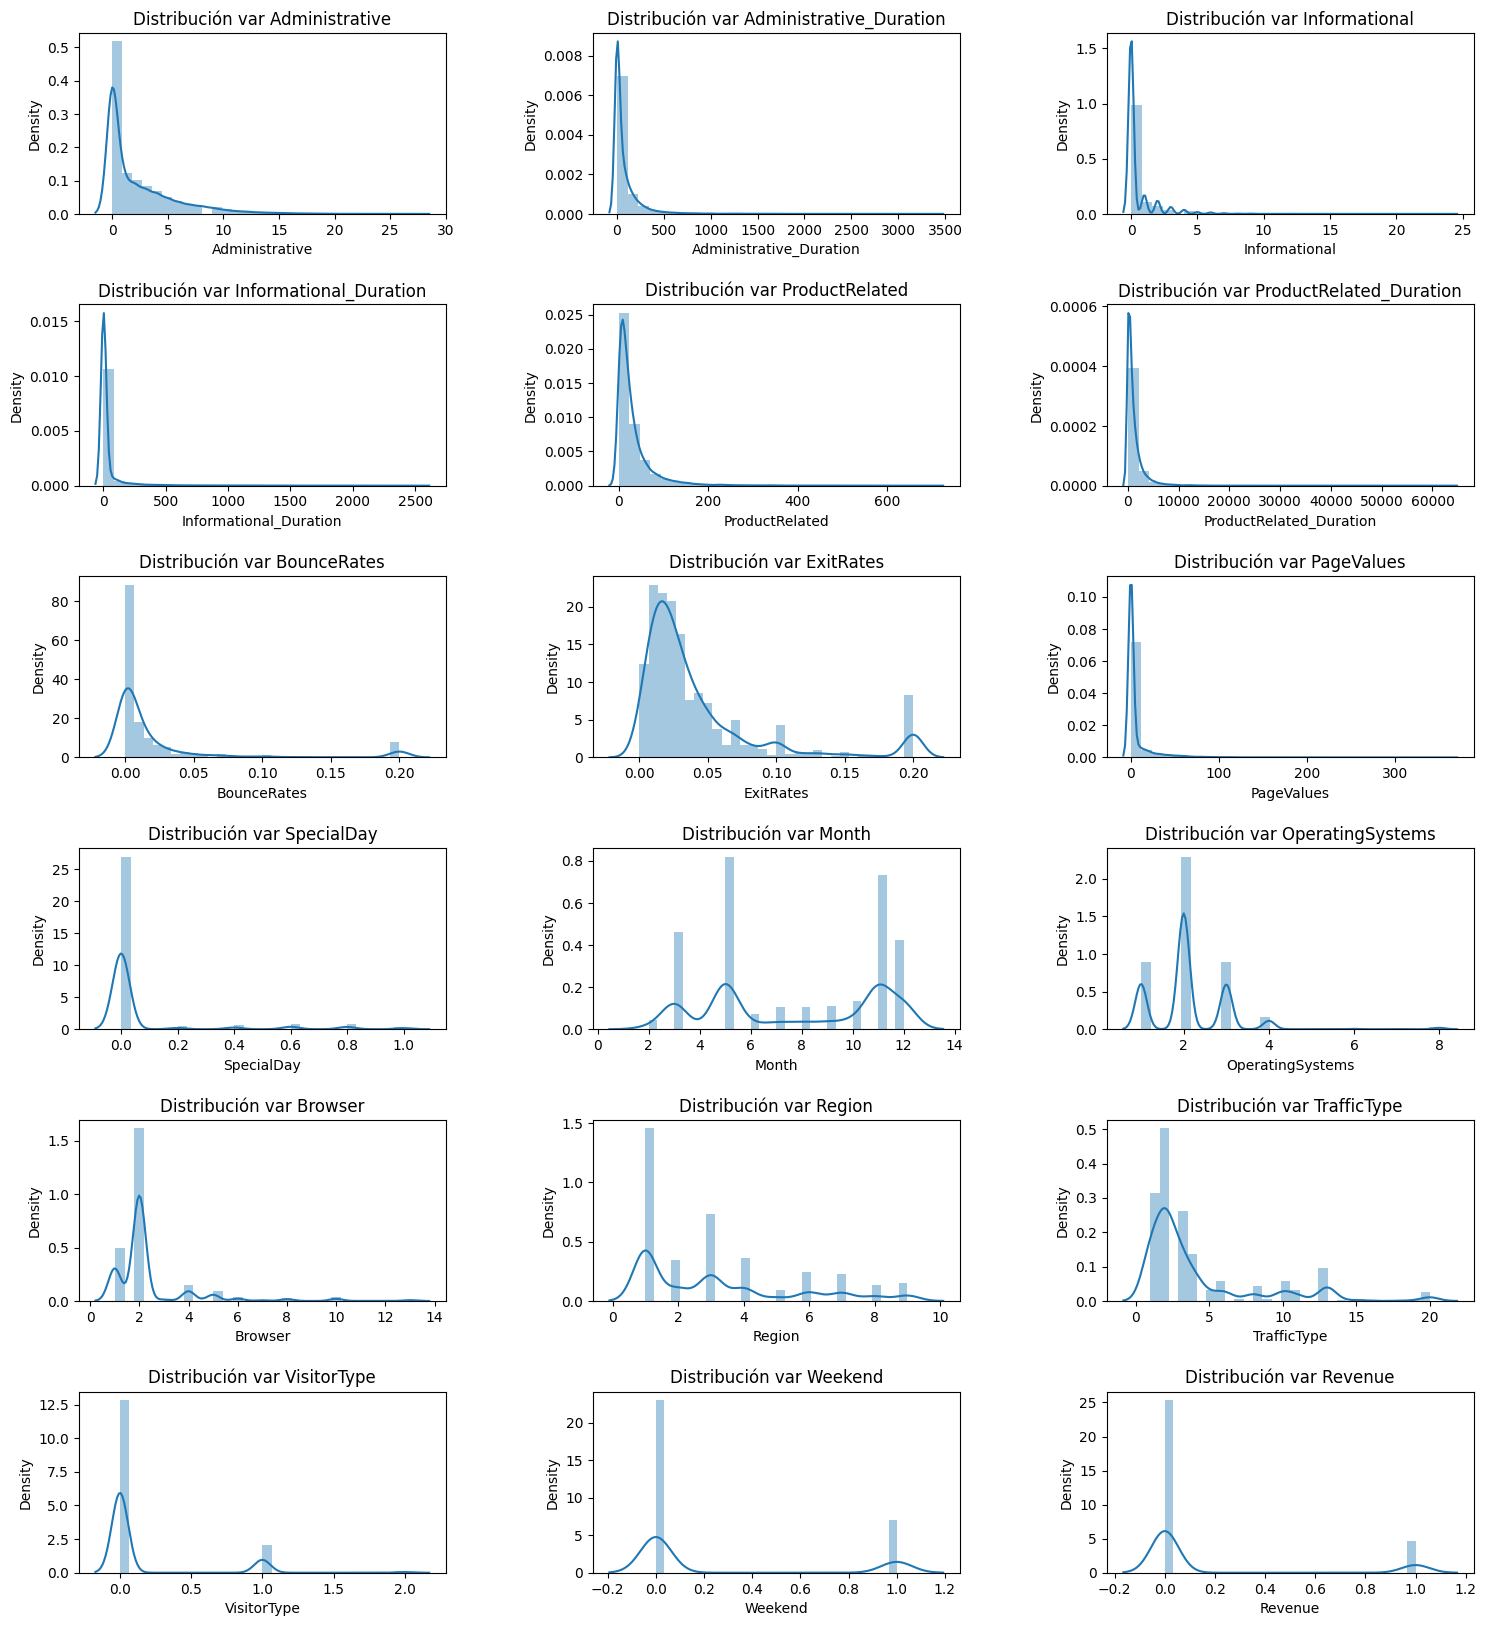

In [324]:
# Representación de los histogramas de los datos completos, incluyendo la target
plt.figure(figsize=(18,20))
n = 0
for i, column in enumerate(df.columns):
    n+=1
    plt.subplot(6, 3, n)
    sns.distplot(df[column], bins=30)
    plt.title('Distribución var {}'.format(column))
plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.show()

**Relaciones de features vs target**

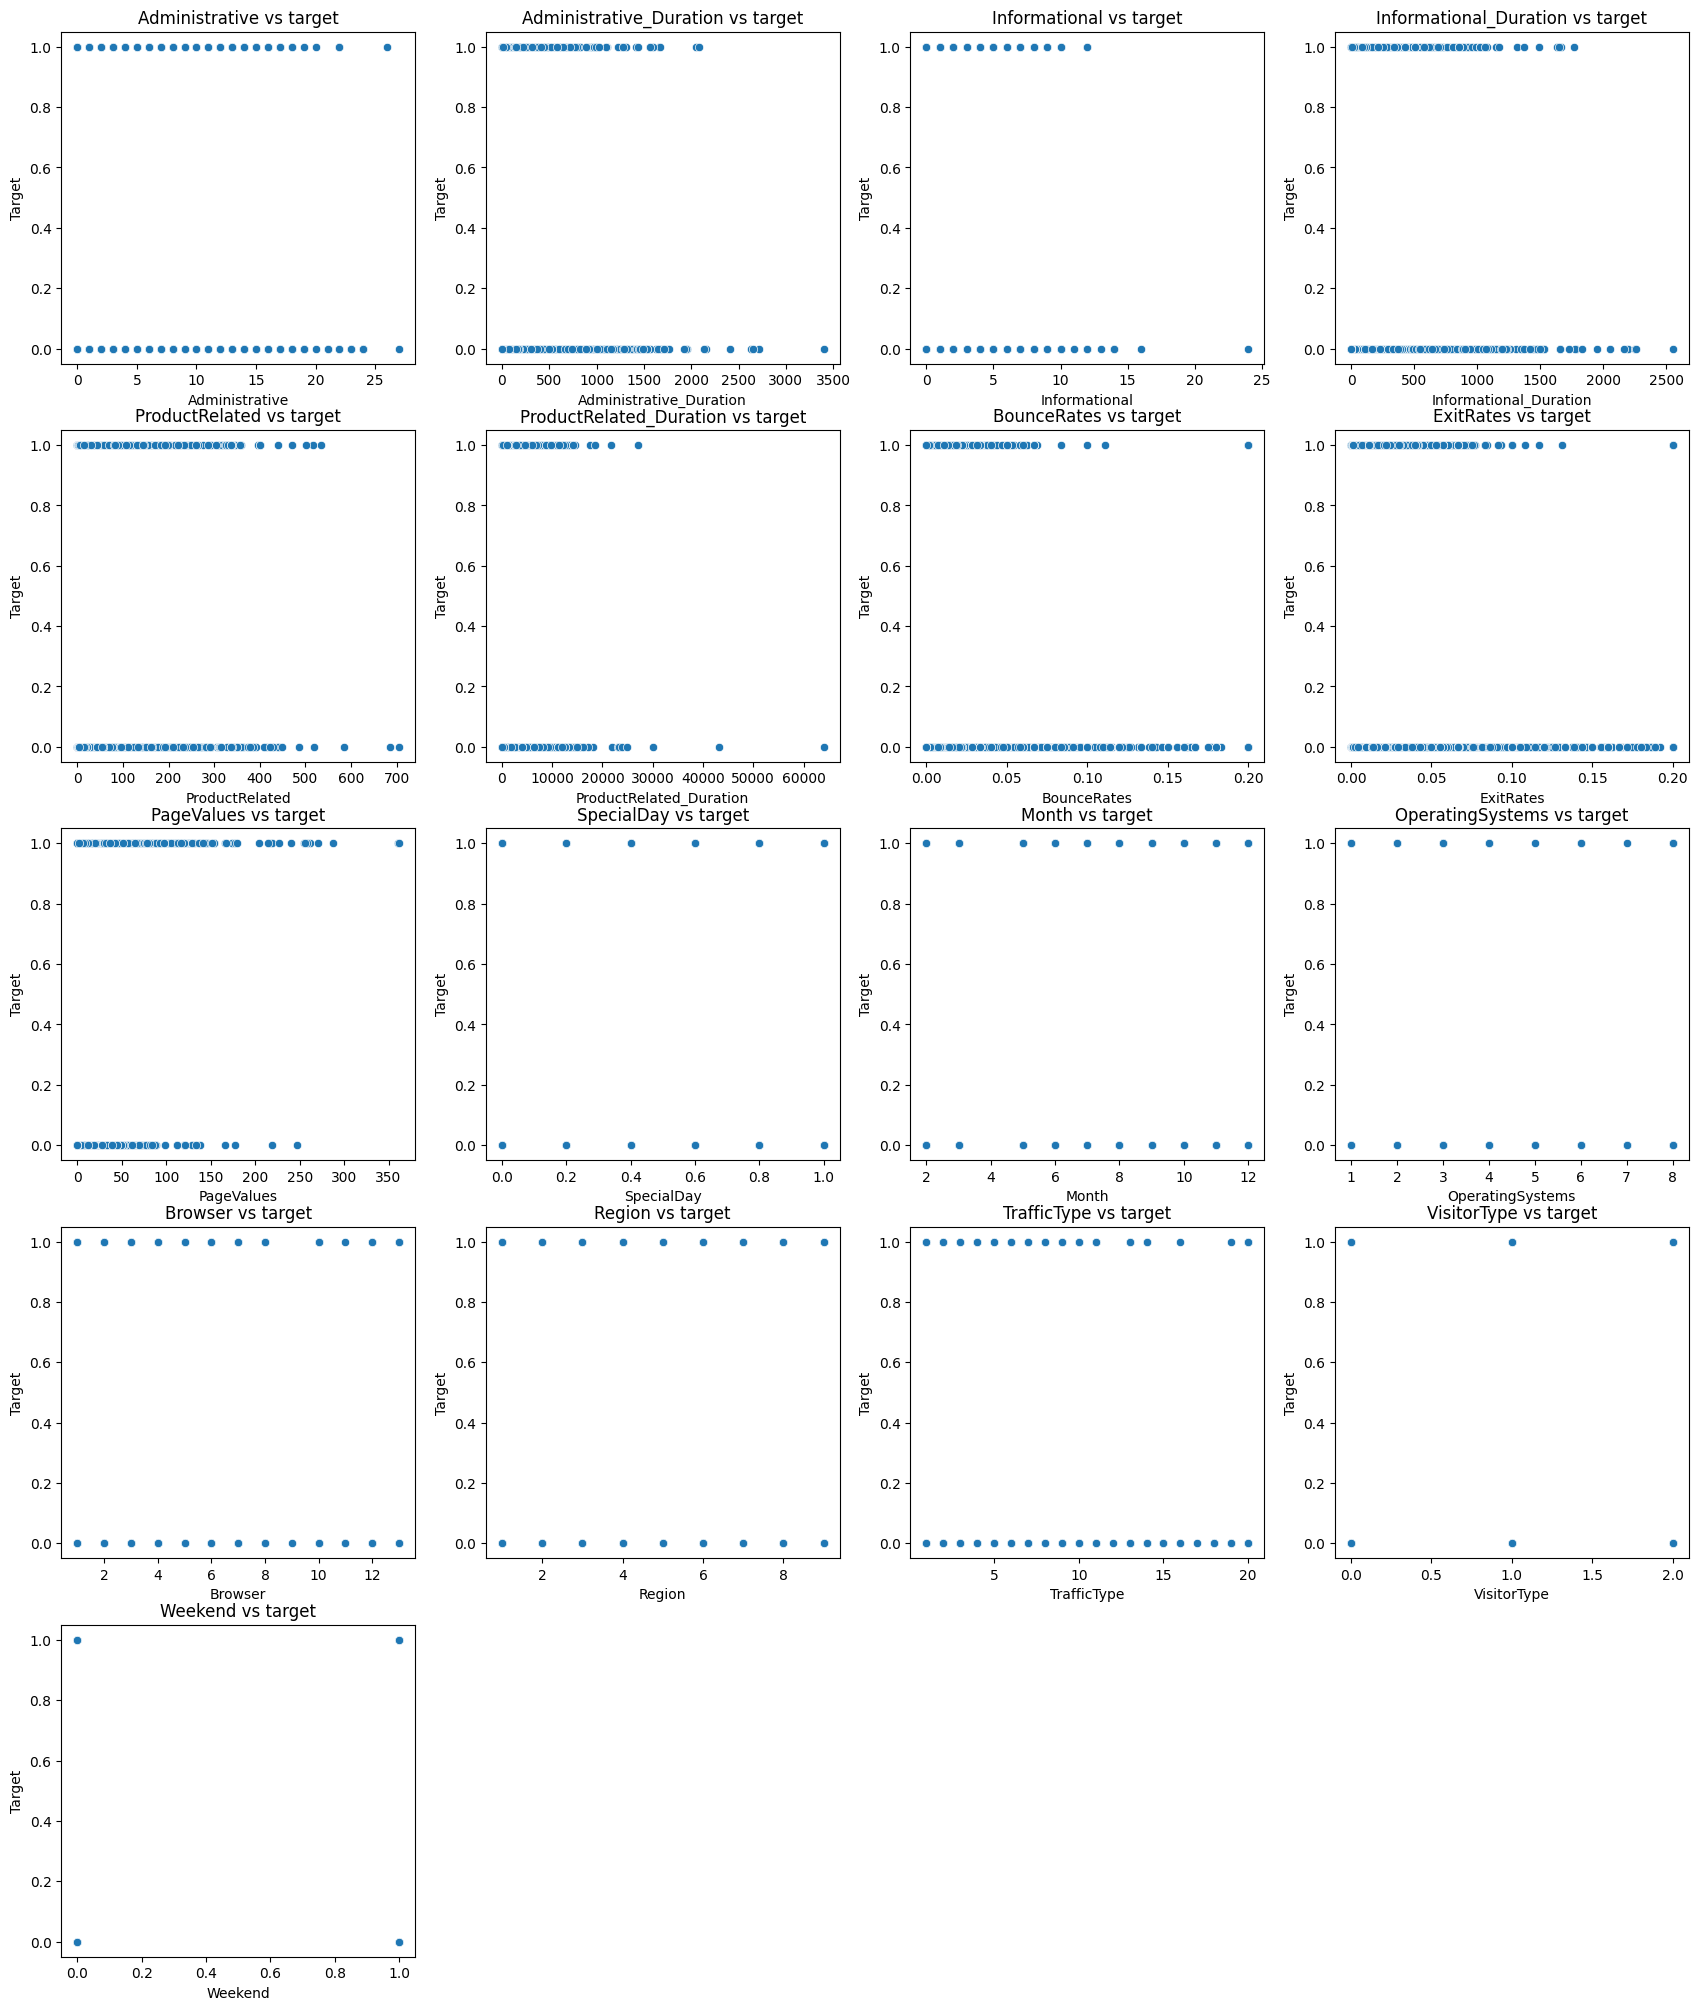

In [325]:
relaciones_vs_target(X, Y)

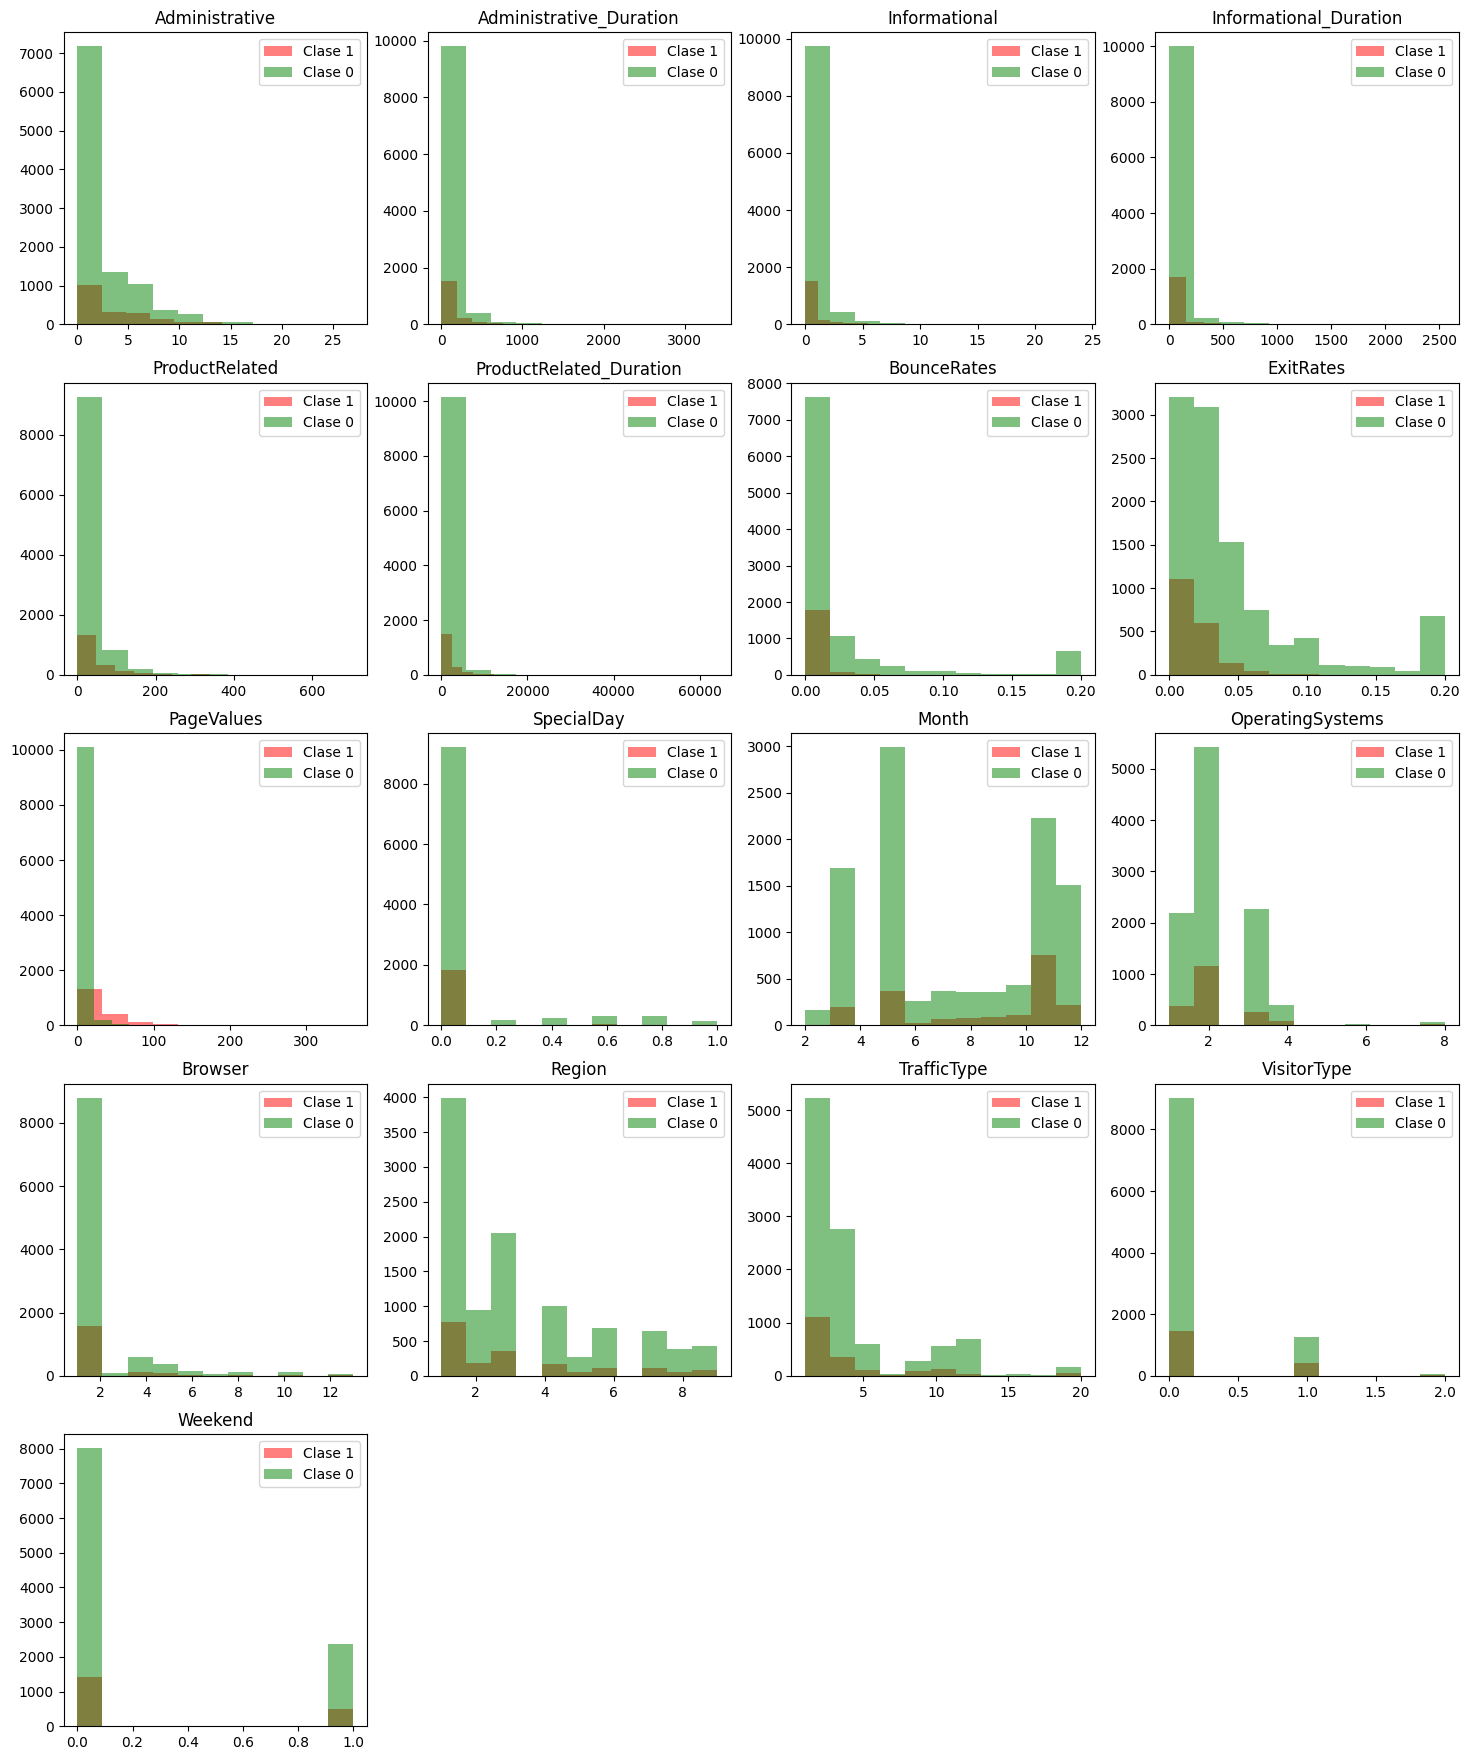

In [326]:
# Representación de las features por el valor del target
hist_pos_neg_feat(X,Y)

Observaciones:

Estos gráficos son muy útiles para analizar el poder predictivo de las variables. Cuanto más se separen las dos distribuciones, mejor para predecir ya que es más fácil discriminarlas.

Por lo tanto, de acuerdo a los gráficos, podemos observar que no existen variables claramente visibles que puedan separar las dos clases de la target.

**Correlaciones con la target**

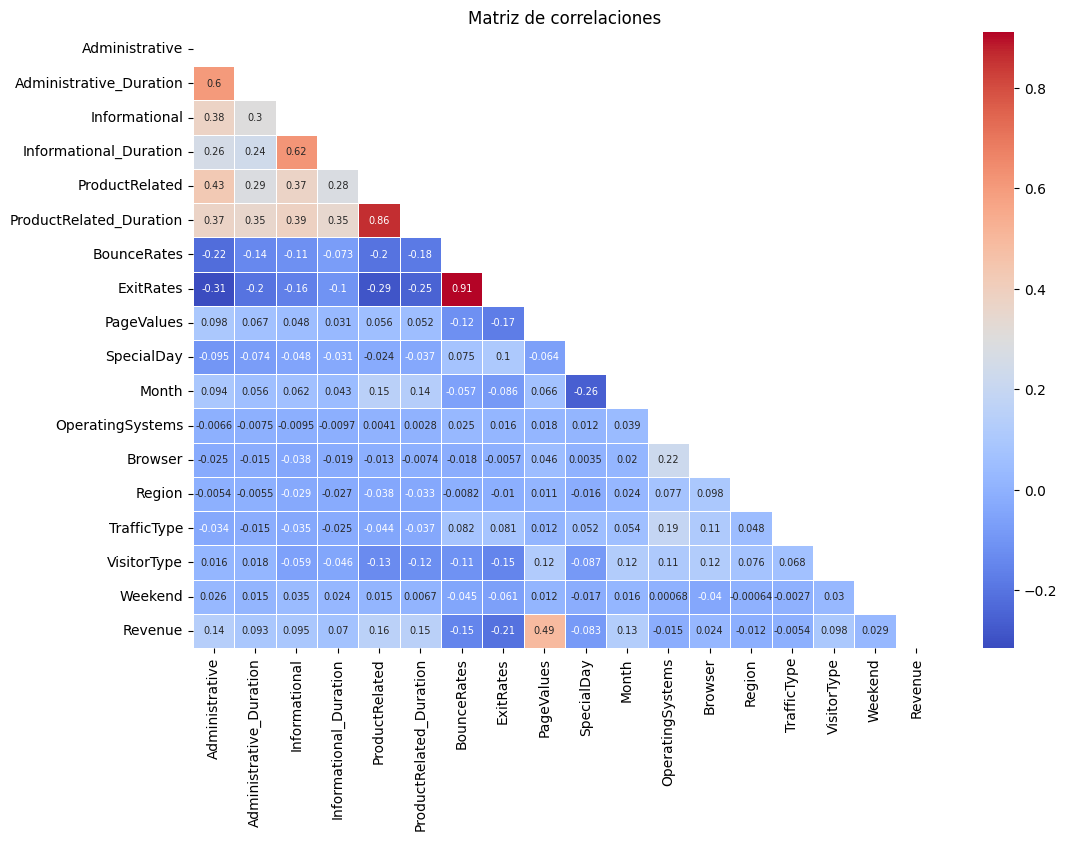

In [327]:
# Representación de la matriz de correlaciones

matriz_correlaciones = df.corr(method='pearson')
mask = np.triu(np.ones_like(matriz_correlaciones, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlaciones, mask=mask, annot=True, annot_kws={'fontsize':7}, fmt='.2g', linewidths=0.5, cmap='coolwarm')
plt.title('Matriz de correlaciones')
plt.show()

In [328]:
# Variables con mayor correlación con la target

correlaciones_target = matriz_correlaciones.values[ -1, : -1]
indices_inversos =  abs(correlaciones_target[ : ]).argsort()[ : : -1]
diccionario = {}
for nombre, correlacion in zip( X.columns[indices_inversos], list(correlaciones_target[indices_inversos] ) ):
    diccionario[nombre] = correlacion
pd.DataFrame.from_dict(diccionario, orient='index', columns=['Correlación con la target'])

,Correlación con la target
PageValues,0.492317
ExitRates,-0.206145
ProductRelated,0.157624
ProductRelated_Duration,0.151528
BounceRates,-0.149348
Administrative,0.137970
Month,0.125913
VisitorType,0.097893
Informational,0.094672
Administrative_Duration,0.092911


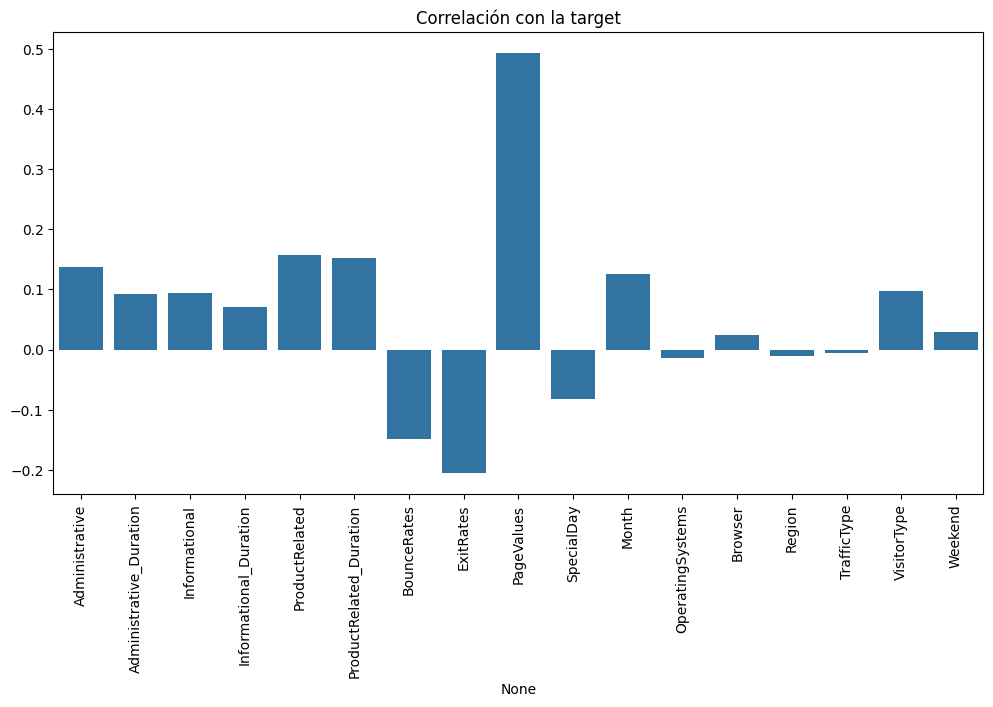

In [329]:
# Gráfica de correlación con la target

data_corr = df.corr()['Revenue'].drop('Revenue')  # Eliminar la correlación de la target consigo misma
sns.barplot(x=data_corr.index, y=data_corr.values).set_title('Correlación con la target')
plt.xticks(rotation=90)
plt.show()

Observaciones:

Se puede observar que **PageValues** es la variable con mayor correlación con **Revenue**.


Nota:

* Correlación positiva: Valores cercanos a 1 indican una fuerte relación positiva.
* Correlación negativa: Valores cercanos a -1 indican una fuerte relación negativa.
* Sin correlación: Valores cercanos a 0 indican poca o ninguna relación lineal.



##**Estandarización de los datos**

Resumiendo lo visto en teoría, la **estandarización** de datos es una técnica utilizada en el procesamiento y preparación de datos para el aprendizaje automático.

Consiste en transformar las características de los datos de manera que tengan una media de 0 y una desviación estándar de 1.

Esta técnica es fundamental cuando se trabaja con algoritmos que son sensibles a las magnitudes de las variables.

**Objetivos de la Estandarización:**

**1. Eliminar las Diferencias de Escala:**

Variables en diferentes escalas pueden afectar el rendimiento de algunos algoritmos de aprendizaje automático. La estandarización pone todas las variables en la misma escala, lo que facilita la comparación entre ellas.

**2. Mejorar la Convergencia de los Modelos:**

Algunos algoritmos, como la regresión logística y las redes neuronales, convergen más rápido cuando las características están estandarizadas.

**3. Facilitar la Interpretación de los Coeficientes:**

En modelos lineales, la estandarización permite interpretar los coeficientes en términos de desviaciones estándar, facilitando la comparación entre variables.

In [330]:
obj_escalar = StandardScaler()
X_estandarizado = obj_escalar.fit_transform(X)

In [331]:
X_estandarizado

array([[-0.6989074 , -0.45823768, -0.39724702, ..., -0.76317216,
        -0.40191529, -0.55117094],
       [-0.6989074 , -0.45823768, -0.39724702, ..., -0.51474124,
        -0.40191529, -0.55117094],
       [-0.6989074 , -0.45823768, -0.39724702, ..., -0.01787942,
        -0.40191529, -0.55117094],
       ...,
       [-0.6989074 , -0.45823768, -0.39724702, ...,  2.21799879,
        -0.40191529,  1.81431916],
       [ 0.50410263, -0.03460371, -0.39724702, ...,  1.72113696,
        -0.40191529, -0.55117094],
       [-0.6989074 , -0.45823768, -0.39724702, ..., -0.51474124,
         2.24654259,  1.81431916]])

##**División en train y test**:

In [332]:
# Divición de los datos en train y test, con un 20 % de tamaño de test
X_train, X_test, Y_train, Y_test = train_test_split(X_estandarizado, Y, test_size=0.2, random_state=42)

##**Aplicación de un modelo de Clasificación Lineal: Regresión Logística**
* Utilizado para predecir la probabilidad de que una variable dependiente binaria tome un valor determinado (generalmente 0 o 1) en función de una o más variables independientes.
* Se hace uso de la librería sklearn
* Esta librería cuenta con un modelo lineal llamado LogisticRegression

###**Definición del modelo**

In [333]:
modelo_lr = LogisticRegression()
parametros = {"C": [0., 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,0.09],
              "class_weight":['balanced', None],
              "random_state": [42]}

### **Optimizando C y class_weight con GridSearch**

Con **GridSearchCV** se realiza una optimización. Esta función lo que hace es ajustar el modelo que se pasa como argumento con todas las combinaciones posibles de los parámetros. En este caso, todas las combinaciones de **C** y **class_weights**.

In [334]:
# Definimos modelo gridsearch que a su vez, dentro de sus parametros utiliza "cv" que es CrossValidation
modelo_gs = GridSearchCV(modelo_lr, param_grid=parametros, cv = 5, scoring='roc_auc')
modelo_gs.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07,
                               0.08, 0.09],
                         'class_weight': ['balanced', None],
                         'random_state': [42]},
             scoring='roc_auc')

In [335]:
print(modelo_gs.best_params_, "\nROC AUC: {}".format(round(modelo_gs.best_score_,2)))

{'C': 0.09, 'class_weight': 'balanced', 'random_state': 42} 
ROC AUC: 0.9


In [336]:
# Definimos un dataframe con los resultados

df_search = pd.DataFrame.from_dict(modelo_gs.cv_results_)

In [337]:
# Observamos primeros valores
df_search.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001324,0.000250,0.000000,0.000000,0.0,balanced,42,"{'C': 0.0, 'class_weight': 'balanced', 'random...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
1,0.000910,0.000064,0.000000,0.000000,0.0,None,42,"{'C': 0.0, 'class_weight': None, 'random_state...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
2,0.039540,0.007328,0.004868,0.000623,0.01,balanced,42,"{'C': 0.01, 'class_weight': 'balanced', 'rando...",0.906574,0.892523,0.896957,0.896445,0.880466,0.894593,0.008443,9


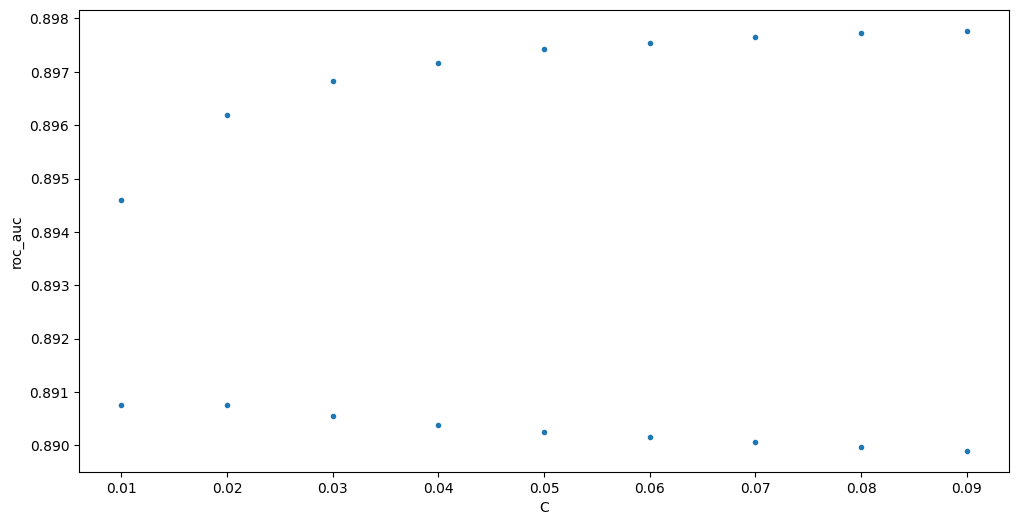

In [338]:
# Graficamos

plt.xlabel('C')
plt.ylabel('roc_auc')
_ = plt.plot( df_search['param_C'], df_search['mean_test_score'], '.')

# df_search['param_C']: Contiene los diferentes valores de C que fueron evaluados.
# df_search['mean_test_score']: Contiene las puntuaciones medias de roc_auc correspondientes a cada valor de C.

### **Mejores parámetros**

Nos quedamos con los mejores parametros obtenidos en el paso anterior.os en el paso anterior.

In [339]:
reg_log =  LogisticRegression(C=modelo_gs.best_params_['C'],
                              class_weight=modelo_gs.best_params_['class_weight'])

**Entrenamiento con los mejores parametros**

In [340]:
reg_log.fit(X_train, Y_train)

LogisticRegression(C=0.09, class_weight='balanced')

###**Análisis de las predicciones**

Con este modelo optimizado, predigo test para ver cómo se comporta en datos que no ha visto antes.

In [341]:
y_test_pred_prob_lr = reg_log.predict_proba(X_test)
y_test_pred_prob_pos_lr = y_test_pred_prob_lr[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg_lr = y_test_pred_prob_lr[np.where(Y_test == 0)[0]]

**Representación de las probabilidades**

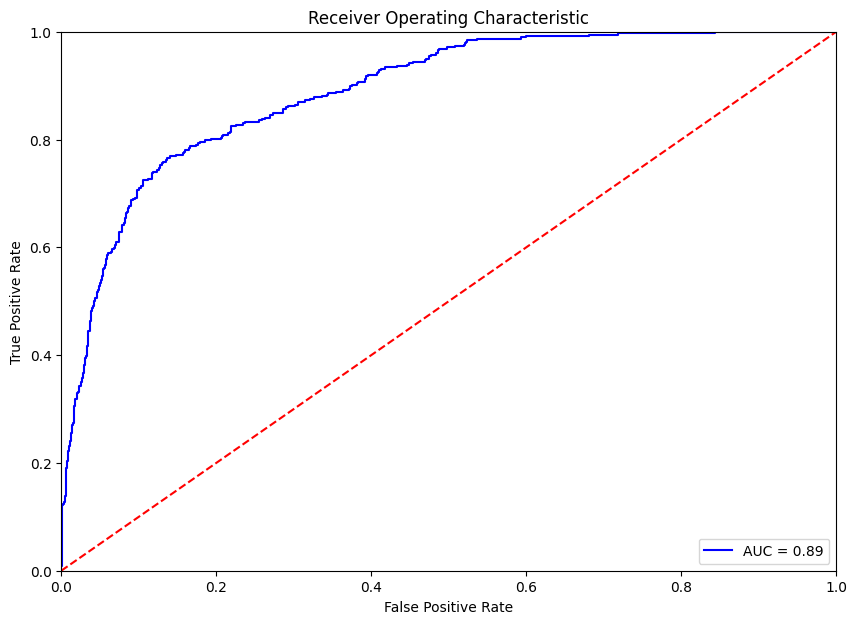

In [342]:
# Curva ROC de las predicciones en Test
preds_lr = y_test_pred_prob_lr[:,1]
fpr_lr, tpr_lr, threshold_lr = metrics.roc_curve(Y_test, preds_lr)
roc_auc_lr = metrics.auc(fpr_lr, tpr_lr)

plt.figure(figsize=(10,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

El siguiente histograma representa en verde las probabilidades que asigna el modelo a los datos que son 0 (cuanto más cerca de 0 la distribución verde mejor) y en rojo las probabilidades asignadas a los datos que son 1 (cuanto más cerca esté de 1 la distribución roja mejor).

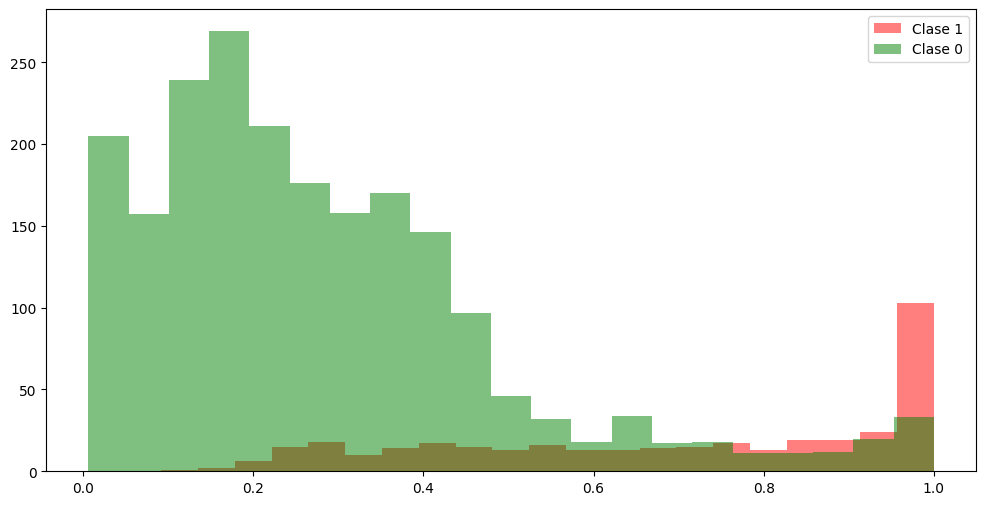

In [343]:
represento_doble_hist(y_test_pred_prob_pos_lr[:, 1], y_test_pred_prob_neg_lr[:, 1], n_bins=21, density=0)

###**Umbralización de las predicciones**

* Las probabilidades que devuelve el modelo son valores continuos entre 0 y 1.

* Para pasarlo a 0 y a 1 es necesario usar un umbral de corte.

* Todo lo que sea mayor que el umbral será predicción = 1

* Todo lo que sea menor que el umbral será predicción = 0.


Observando el gráfico, podriamos preveer que el umbral debería ser aproximadamente 0.6, 0.7.

In [344]:
# Iteración de umbrales
umbrales_lr = [0.5, 0.6, 0.7]
for umbral in umbrales_lr:
  y_umbralizadas_lr = 1*(y_test_pred_prob_lr[:, 1] > umbral)
  print(f"\nUmbral:", umbral)
  print(u"\nMatriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas_lr))
  print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_umbralizadas_lr),2)))
  print("Sensitividad\t{}".format(round(metrics.recall_score(Y_test, y_umbralizadas_lr),2)))
  print(u"Precisión\t{}".format(round(metrics.precision_score(Y_test, y_umbralizadas_lr),2)))


Umbral: 0.5

Matriz de confusión
 [[1848  232]
 [ 103  274]]

Accuracy	0.86
Sensitividad	0.73
Precisión	0.54

Umbral: 0.6

Matriz de confusión
 [[1916  164]
 [ 135  242]]

Accuracy	0.88
Sensitividad	0.64
Precisión	0.6

Umbral: 0.7

Matriz de confusión
 [[1967  113]
 [ 169  208]]

Accuracy	0.89
Sensitividad	0.55
Precisión	0.65


**Elección del umbral:**

 Se busca reducir los falsos positivos y maximizar la precisión de los casos positivos identificados, entonces un umbral más alto **(0.7)** sería más apropiado, a pesar de una menor sensibilidad:

* Umbral: **0.7**

Matriz de confusión

 [1967---113]

 [169----208]

* Accuracy **0.89**
* Sensitividad	**0.55**
* Precisión	**0.65**

##**Aplicación de un modelo de Clasificación de Redes Neuronales**

* Se hace uso de la librería sklearn.

* Esta librería cuenta con un clasificador llamado MLPClassifier, el cual es lo que se denomina un Multi-layer Perceptron Classifier.

* Configuración más común y estándard de las redes neuronales.
  * Cuentan con una capa de **entrada**, una de **salida** y **múltiples** capas ocultas.
  * Se trata de una arquitectura de red neuronal **fully-connected**, es decir, las neuronas de cada capa se conectan a todas las neuronales de las capas anteriores y de las siguientes.

###**Definición del modelo**

In [345]:
# Definición del modelo

modelo_rn = MLPClassifier()
parametros_rn = {'solver': ['lbfgs'], # lbfgs algorítmo para conjunto de datos pequeño
              'max_iter': [100,200,300,500], # Iteraciones máximas en cada red
              'alpha': 10.0 ** -np.arange(1, 10), # Parámetro de regularización L2 para evitar sobreajuste
              'hidden_layer_sizes':np.arange(30, 35), # Número de neuronas en cada capa
              'random_state':[42]}

###**Optimizando con GridSearch**

In [346]:
modelo_gs_rn = GridSearchCV(modelo_rn, param_grid=parametros_rn, cv = 3,
                         scoring='roc_auc', n_jobs=-1, verbose=1)
modelo_gs_rn.fit(X_train, Y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09]),
                         'hidden_layer_sizes': array([30, 31, 32, 33, 34]),
                         'max_iter': [100, 200, 300, 500], 'random_state': [42],
                         'solver': ['lbfgs']},
             scoring='roc_auc', verbose=1)

In [347]:
print(modelo_gs_rn.best_params_, "\nROC AUC: {}".format(round(modelo_gs_rn.best_score_,2)))

{'alpha': 0.01, 'hidden_layer_sizes': 30, 'max_iter': 100, 'random_state': 42, 'solver': 'lbfgs'} 
ROC AUC: 0.9


###**Mejores parámetros**

Nos quedamos con los mejores parametros obtenidos en el paso anterior.

In [348]:
red_n = MLPClassifier(**modelo_gs_rn.best_params_, verbose=1)

**Entrenamiento con los mejores parametros**

In [349]:
red_n.fit(X_train, Y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=30, max_iter=100, random_state=42,
              solver='lbfgs', verbose=1)

###**Análisis de las predicciones**

Con este modelo optimizado, predigo test para ver cómo se comporta en datos que no ha visto antes.

In [350]:
y_test_pred_prob_rn = red_n.predict_proba(X_test)
y_test_pred_prob_pos_rn = y_test_pred_prob_rn[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg_rn = y_test_pred_prob_rn[np.where(Y_test == 0)[0]]

**Representación de las probabilidades**

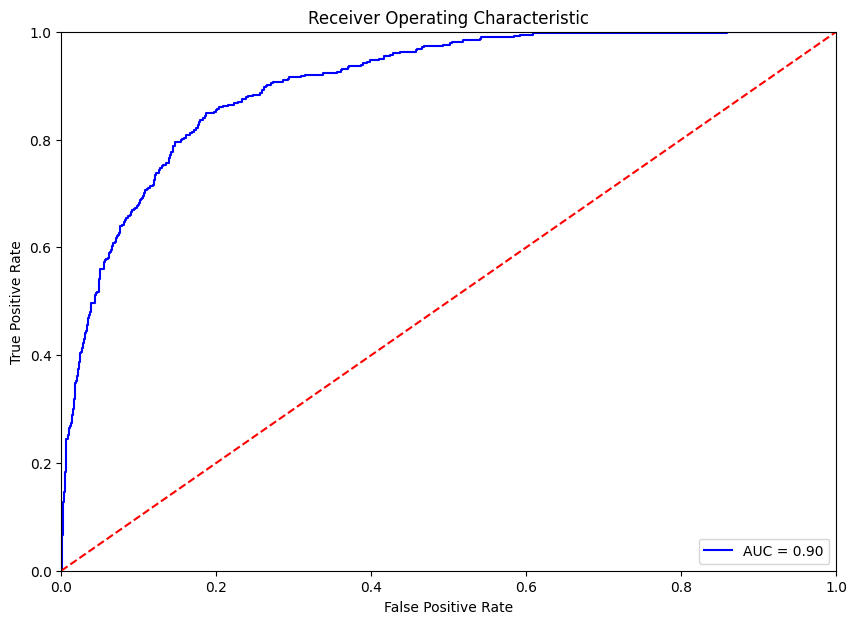

In [351]:
# Curva ROC de las predicciones en Test
preds_rn = y_test_pred_prob_rn[:,1]
fpr_rn, tpr_rn, threshold_rn = metrics.roc_curve(Y_test, preds_rn)
roc_auc_rn = metrics.auc(fpr_rn, tpr_rn)

plt.figure(figsize=(10,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_rn, tpr_rn, 'b', label = 'AUC = %0.2f' % roc_auc_rn)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

El siguiente histograma representa en verde las probabilidades que asigna el modelo a los datos que son 0 (cuanto más cerca de 0 la distribución verde mejor) y en rojo las probabilidades asignadas a los datos que son 1 (cuanto más cerca esté de 1 la distribución roja mejor).

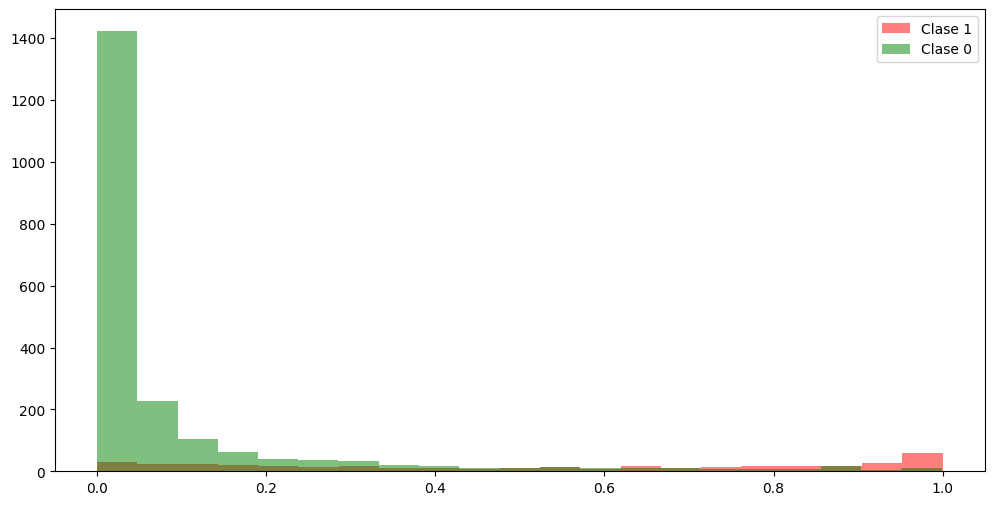

In [352]:
represento_doble_hist(y_test_pred_prob_pos_rn[:, 1], y_test_pred_prob_neg_rn[:, 1], n_bins=21, density=0)

###**Umbralización de predicciones**

* Las probabilidades que devuelve el modelo son valores continuos entre 0 y 1.

* Para pasarlo a 0 y a 1 es necesario usar un umbral de corte.

* Todo lo que sea mayor que el umbral será predicción = 1

* Todo lo que sea menor que el umbral será predicción = 0.


Observando el gráfico, podriamos preveer que el umbral debería ser aproximadamente 0.5, 0.6.

In [353]:
# Iteración de umbrales
umbrales_rn = [0.4, 0.5, 0.6]
for umbral in umbrales_rn:
  y_umbralizadas_rn = 1*(y_test_pred_prob_rn[:, 1] > umbral)
  print(f"\nUmbral:", umbral)
  print(u"\nMatriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas_rn))
  print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_umbralizadas_rn),2)))
  print("Sensitividad\t{}".format(round(metrics.recall_score(Y_test, y_umbralizadas_rn),2)))
  print(u"Precisión\t{}".format(round(metrics.precision_score(Y_test, y_umbralizadas_rn),2)))


Umbral: 0.4

Matriz de confusión
 [[1948  132]
 [ 154  223]]

Accuracy	0.88
Sensitividad	0.59
Precisión	0.63

Umbral: 0.5

Matriz de confusión
 [[1975  105]
 [ 171  206]]

Accuracy	0.89
Sensitividad	0.55
Precisión	0.66

Umbral: 0.6

Matriz de confusión
 [[2000   80]
 [ 194  183]]

Accuracy	0.89
Sensitividad	0.49
Precisión	0.7


**Elección del umbral:**

 Se busca reducir los falsos positivos y maximizar la precisión de los casos positivos identificados, entonces un umbral más alto **(0.6)** sería más apropiado, a pesar de una menor sensibilidad:

* Umbral: **0.6**

Matriz de confusión

 [2000--80]

 [194----183]

* Accuracy **0.89**
* Sensitividad	**0.49**
* Precisión	**0.70**

## **Aplicación de un modelo de Clasificación: Random Forest**

* Se basa en la construcción de múltiples árboles de decisión durante el entrenamiento y la salida de la clase que es el modo de las clases (clasificación) o la media de las predicciones (regresión) de los árboles individuales.

* Se hace uso de la librería sklearn.

* Esta librería cuenta con un clasificador llamado RandomForestClassifier

###**Definición del modelo**

In [354]:
model_rf = RandomForestClassifier(verbose=0)
parametros_rf = {"n_estimators": [40,60,80,100],
              "max_depth": [15,20,25],
              "min_samples_leaf": [2,3,4],
              "min_samples_split": [4,6],
              "random_state": [42]
}



###**Optimizando con GridSearch**

In [355]:
model_gs_rf = GridSearchCV(estimator=model_rf, param_grid=parametros_rf)

model_gs_rf.fit(X_train, Y_train)
print(u'Mejores parámetros del modelo: {}'.format(model_gs_rf.best_params_))

Mejores parámetros del modelo: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100, 'random_state': 42}


###**Mejores parámetros**

Nos quedamos con los mejores parametros obtenidos en el paso anterior.

In [356]:
print(model_gs_rf.best_params_, "\nROC AUC: {}".format(round(model_gs_rf.best_score_,2)))

{'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100, 'random_state': 42} 
ROC AUC: 0.9


In [357]:
r_forest = RandomForestClassifier(**model_gs_rf.best_params_, verbose=0)

**Entrenamiento con los mejores parametros**

In [358]:
r_forest.fit(X_train, Y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=6,
                       random_state=42)

###**Análisis de las predicciones**

Con este modelo optimizado, predigo test para ver cómo se comporta en datos que no ha visto antes.

In [359]:
y_test_pred_prob_rf = r_forest.predict_proba(X_test)
y_test_pred_prob_pos_rf = y_test_pred_prob_rf[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg_rf = y_test_pred_prob_rf[np.where(Y_test == 0)[0]]

**Representación de las probabilidades**

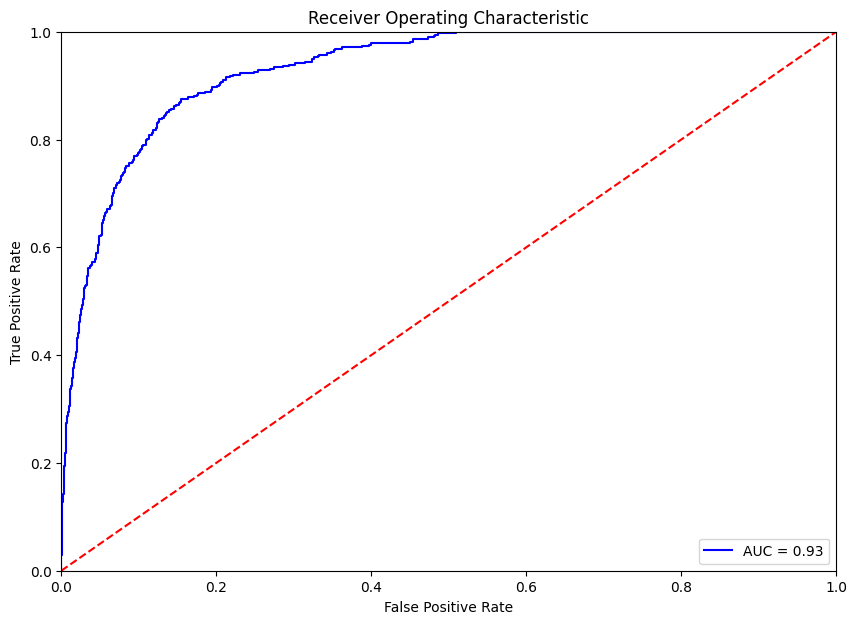

In [360]:
# Curva ROC de las predicciones en Test
preds_rf = y_test_pred_prob_rf[:,1]
fpr_rf, tpr_rf, threshold_rf = metrics.roc_curve(Y_test, preds_rf)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)

plt.figure(figsize=(10,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_rf, tpr_rf, 'b', label = 'AUC = %0.2f' % roc_auc_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

El siguiente histograma representa en verde las probabilidades que asigna el modelo a los datos que son 0 (cuanto más cerca de 0 la distribución verde mejor) y en rojo las probabilidades asignadas a los datos que son 1 (cuanto más cerca esté de 1 la distribución roja mejor).

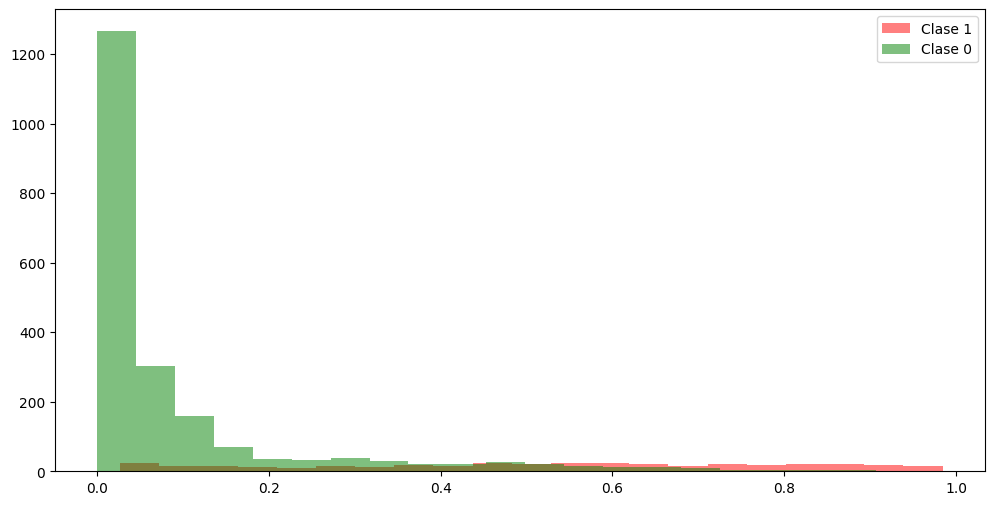

In [361]:
represento_doble_hist(y_test_pred_prob_pos_rf[:, 1], y_test_pred_prob_neg_rf[:, 1], n_bins=21, density=0)

###**Umbralización de predicciones**

* Las probabilidades que devuelve el modelo son valores continuos entre 0 y 1.

* Para pasarlo a 0 y a 1 es necesario usar un umbral de corte.

* Todo lo que sea mayor que el umbral será predicción = 1

* Todo lo que sea menor que el umbral será predicción = 0.


Observando el gráfico, podriamos preveer que el umbral debería ser aproximadamente 0.5

In [362]:
# Iteración de umbrales
umbrales_rf = [0.5, 0.6, 0.7]
for umbral in umbrales_rf:
  y_umbralizadas_rf = 1*(y_test_pred_prob_rf[:, 1] > umbral)
  print(f"\nUmbral:", umbral)
  print(u"\nMatriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas_rf))
  print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_umbralizadas_rf),2)))
  print("Sensitividad\t{}".format(round(metrics.recall_score(Y_test, y_umbralizadas_rf),2)))
  print(u"Precisión\t{}".format(round(metrics.precision_score(Y_test, y_umbralizadas_rf),2)))


Umbral: 0.5

Matriz de confusión
 [[1999   81]
 [ 163  214]]

Accuracy	0.9
Sensitividad	0.57
Precisión	0.73

Umbral: 0.6

Matriz de confusión
 [[2037   43]
 [ 218  159]]

Accuracy	0.89
Sensitividad	0.42
Precisión	0.79

Umbral: 0.7

Matriz de confusión
 [[2058   22]
 [ 263  114]]

Accuracy	0.88
Sensitividad	0.3
Precisión	0.84


**Elección del umbral:**

* Umbral: **0.5**

Matriz de confusión

 [1999--81]

 [163----214]

* Accuracy **0.90**
* Sensitividad	**0.57**
* Precisión	**0.73**

## **Elección del mejor modelo**

El modelo elegído para el caso de estudio será:
**Random Forest**

### **Valores de la Métrica ROC en Cross Validation**

In [363]:
print("Metrica ROC-CV Regresión Logística: {:.2f}".format(roc_auc_lr))
print("Metrica ROC-CV Red Neuronal: {:.2f}".format(roc_auc_rn))
print("Metrica ROC-CV Random Forest: {:.2f}".format(roc_auc_rf))

Metrica ROC-CV Regresión Logística: 0.89
Metrica ROC-CV Red Neuronal: 0.90
Metrica ROC-CV Random Forest: 0.93


### **Cross Validation (Validación Cruzada)**
* La validación cruzada es una técnica de evaluación de modelos que se utiliza para estimar la capacidad de generalización de un modelo de aprendizaje automático. Proporciona una mejor estimación del rendimiento del modelo en datos no observados en comparación con un único conjunto de entrenamiento y prueba.

* Consiste en dividir el conjunto de datos en múltiples subconjuntos (o "folds") y entrenar el modelo varias veces, utilizando diferentes combinaciones de estos subconjuntos para entrenamiento y validación.

Métodos de Validación Cruzada utilizado

**k-Fold Cross Validation:**

* El conjunto de datos se divide en k subconjuntos de tamaño aproximadamente igual. El modelo se entrena
k veces, cada vez utilizando k-1 folds para entrenamiento y 1 fold para validación. La media del rendimiento a través de las k iteraciones se utiliza como estimación de la capacidad de generalización del modelo.

In [364]:
print(format(round(cross_val_score(reg_log, X, Y, cv=10).mean(),2)))
print(format(round(cross_val_score(reg_log, X, Y, cv=10, scoring='precision').mean(),2)))
print(format(round(cross_val_score(reg_log, X, Y, cv=10, scoring='recall').mean(),2)))

0.86
0.55
0.75


In [365]:
print(format(round(cross_val_score(red_n, X, Y, cv=10).mean(),2)))
print(format(round(cross_val_score(red_n, X, Y, cv=10, scoring='precision').mean(),2)))
print(format(round(cross_val_score(red_n, X, Y, cv=10, scoring='recall').mean(),2)))

0.87
0.57
0.36


In [366]:
print(format(round(cross_val_score(r_forest, X, Y, cv=10).mean(),2)))
print(format(round(cross_val_score(r_forest, X, Y, cv=10, scoring='precision').mean(),2)))
print(format(round(cross_val_score(r_forest, X, Y, cv=10, scoring='recall').mean(),2)))

0.89
0.72
0.52
